In [1]:
# for dataset generating
from sklearn import datasets

# for ploting
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

import pandas as pd
import numpy as np

## 1. Найти "грязный" датасет
Сгенерируем датасет для классификатора используя модуль **datasets** из **sklearn**

In [2]:
data, target = datasets.make_classification(n_samples=1000, n_features=6, n_informative=2, class_sep=10, hypercube=False,
                                            n_redundant=0, n_classes=3, n_clusters_per_class=1,
                                            random_state=42)

Отрисуем данные по информативным признакам

In [3]:
def plot_dots(array2D, colors):
    plt.scatter(list(map(lambda x: x[0], array2D[0])), list(map(lambda x: x[1], array2D[0])), c=array2D[1], cmap=colors)

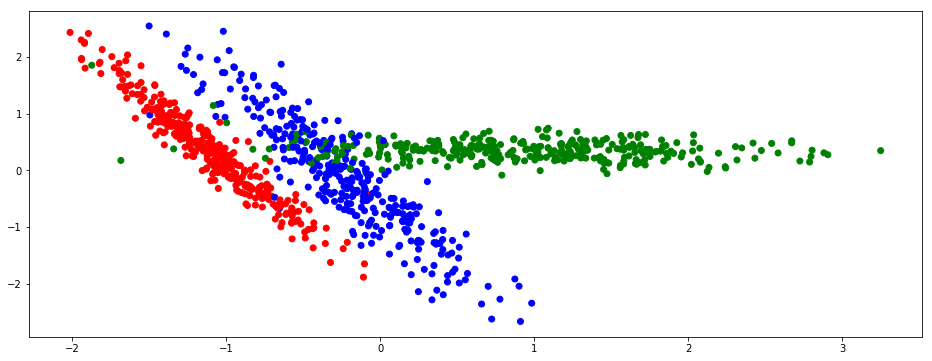

In [4]:
colors = ListedColormap(['red','green','blue'])
light_colors = ListedColormap(['lightcoral','lightgreen','lightblue'])
plt.figure(figsize=(16, 6))
plot_dots((data,target), colors)

Имплементируем функцию для повреждения данных

In [5]:
def damage_the_data(data):
    threshold = 2
    for i,row in enumerate(data):
        for j,elem in enumerate(row):
            probability = abs(np.random.randn())
            if probability > threshold:
                if np.random.rand() > 0.5:
                    data[i,j] = np.nan
                else:
                    data[i,j] = '?'
    return data

## 2. Используя библиотеки pandas и numpy загрузите данные

In [6]:
columns = [f'feature_{i}' for i in range(len(data[0]))]
df = pd.DataFrame(data=damage_the_data(np.array(data, dtype=str)), columns=columns)
df['target'] = target

#del data, target

## 3. Используйте базовые функции pandas, чтобы охарактеризовать данные

In [7]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,-0.0786996854038424,-0.4220684552161746,-0.5871541590312039,0.8262494226728235,0.38934239421973693,0.08595738801721546,0
1,0.6614016061792471,?,nan,-0.11471712412457906,0.13218646951488633,-0.88637514063998,1
2,1.2150982357031987,0.29966218871991773,-0.49314485575414874,-1.0893499965854994,-0.980407409798038,1.212158688550331,1
3,-1.369042533219327,1.1628271861835384,0.1053093208790869,-0.5693837001481272,0.4803046530132987,0.5684802252745983,0
4,-0.6287183464751029,0.36158399819179404,0.2598832349192977,0.6725196983410208,0.2921972948833408,-0.7810089435481842,2


In [8]:
df.tail()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,target
995,1.3020765539649017,0.21996740059721484,0.19656354764246445,0.8642436147342264,-1.8604479999243069,-0.5713742524172769,1
996,-0.3370508233876912,0.09491300299687754,-0.8028080349487572,-1.0837353699401662,1.9757358680726422,nan,2
997,-0.08515294952288607,nan,0.23053712782830446,-0.2521534658435748,0.3982209514202937,2.0180773827178204,2
998,1.0289468808038742,0.4189588743191601,-1.0843712084571229,1.3201841971984174,-1.4019080677162379,0.29760494279712235,1
999,-0.4312737883386001,?,0.8382368795711403,0.9584765276047547,2.028628924269873,-1.0964024861514015,0


In [9]:
df.describe()

,target
count,1000.00000
mean,1.00000
std,0.81527
min,0.00000
25%,0.00000
50%,1.00000
75%,2.00000
max,2.00000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
feature_0    1000 non-null object
feature_1    1000 non-null object
feature_2    1000 non-null object
feature_3    1000 non-null object
feature_4    1000 non-null object
feature_5    1000 non-null object
target       1000 non-null int32
dtypes: int32(1), object(6)
memory usage: 50.9+ KB


## 4-6. Реализовать функции для передобработки данных

In [11]:
from preprocessing import DataFrameWrapper

## 7. Обработать датасет реализованными ранее функциями.

In [12]:
df_wrapper = DataFrameWrapper(df)
df_wrapper.replace('?', np.nan, inplace=True)
df_wrapper.replace('nan', np.nan, inplace=True)
df_wrapper.dataframe = df_wrapper.dataframe.astype(float)
dropna_df = df_wrapper.drop_na(inplace=False)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
dropna_df.target = dropna_df.target.astype(int)

In [14]:
dropna_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 998
Data columns (total 7 columns):
feature_0    776 non-null float64
feature_1    776 non-null float64
feature_2    776 non-null float64
feature_3    776 non-null float64
feature_4    776 non-null float64
feature_5    776 non-null float64
target       776 non-null int32
dtypes: float64(6), int32(1)
memory usage: 45.5 KB


In [15]:
dropna_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,-0.078700,-0.422068,-0.587154,0.826249,0.389342,0.085957,0
2,1.215098,0.299662,-0.493145,-1.089350,-0.980407,1.212159,1
3,-1.369043,1.162827,0.105309,-0.569384,0.480305,0.568480,0
4,-0.628718,0.361584,0.259883,0.672520,0.292197,-0.781009,2
5,2.880273,0.311383,0.414594,-0.572682,0.671698,-1.356036,1


## 8. Разбить данные на подвыборки для тренировки и для тестирования

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = dropna_df.drop(columns=['target'],axis=1).values
y = dropna_df.target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 9. Натренировать модель машинного обучения и подсчитать метрику качества.

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [19]:
classifier = DecisionTreeClassifier(random_state=42, max_depth=6)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [20]:
for i,value in enumerate(classifier.feature_importances_):
    print(f"feature {i}: {round(value,5)}")

feature 0: 0.79444
feature 1: 0.1697
feature 2: 0.00401
feature 3: 0.01751
feature 4: 0.00912
feature 5: 0.00522


In [21]:
def get_meshgrid(data, step=.05, border=.5):
    xmin, xmax = data[:,0].min()-border, data[:,0].max()+border
    ymin, ymax = data[:,1].min()-border, data[:,1].max()+border
    return np.meshgrid(np.arange(xmin, xmax, step), np.arange(ymin, ymax, step))

def plot_decision_surface(estimator, train_data, test_data, train_labels, test_labels, 
                          colors=colors, light_colors=light_colors):
    dimentions = len(train_data[0])
    xx, yy = get_meshgrid(train_data)    
    cls_input = []
    for x, y in zip(xx.ravel(),yy.ravel()):
        sample = [x,y]
        sample.extend([0]*(dimentions-2))
        cls_input.append(sample)
    
    plt.figure(figsize=(16,8))
    # Plot decision surface on train data
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(cls_input).reshape(xx.shape))
    plt.pcolormesh(xx,yy,mesh_predictions,cmap=light_colors)
    plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, cmap=colors, s=100)    
    train_accuracy = accuracy_score(train_labels, estimator.predict(train_data))
    plt.title("Train data (max depth {}), accuracy {:.2f}".format(estimator.max_depth,train_accuracy))
    plt.xlim(train_data[:,0].min(),train_data[:,0].max())
    plt.ylim(train_data[:,1].min(),train_data[:,1].max())
    
    # Plot decision surface on test data
    plt.subplot(1,2,2)
    plt.pcolormesh(xx,yy,mesh_predictions,cmap=light_colors)
    plt.scatter(test_data[:,0], test_data[:,1], c=test_labels, cmap=colors, s=100)    
    test_accuracy = accuracy_score(test_labels, estimator.predict(test_data))
    plt.title("Test data (max depth {}), accuracy {:.2f}".format(estimator.max_depth,test_accuracy))
    plt.xlim(train_data[:,0].min(),train_data[:,0].max())
    plt.ylim(train_data[:,1].min(),train_data[:,1].max())

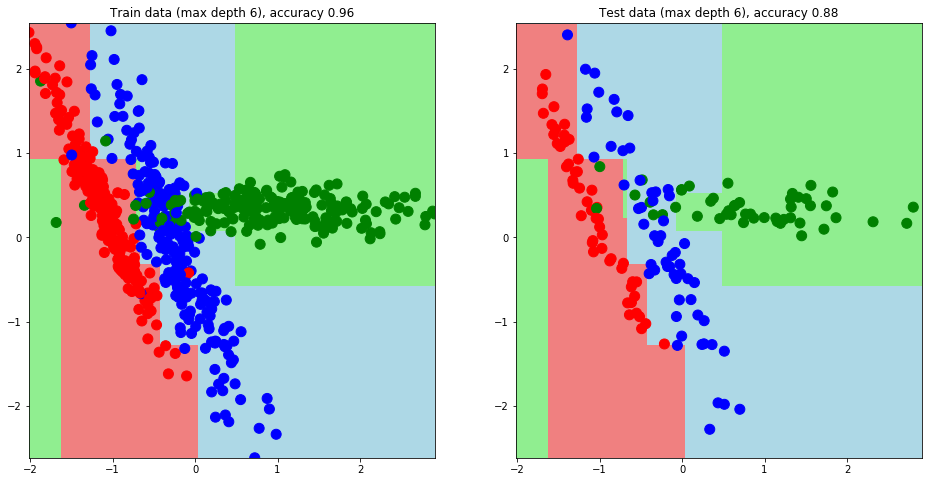

In [22]:
plot_decision_surface(classifier, X_train, X_test, y_train, y_test)

## 10. Попробовать другие способы предобработки данных на этапе 7 и посмотреть, как изменится результат на этапе 9.

In [23]:
df_wrapper.dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
feature_0    959 non-null float64
feature_1    952 non-null float64
feature_2    961 non-null float64
feature_3    953 non-null float64
feature_4    954 non-null float64
feature_5    958 non-null float64
target       1000 non-null float64
dtypes: float64(7)
memory usage: 54.8 KB


In [24]:
df_wrapper.knn_replace(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
new_df = df_wrapper.dataframe
new_df.target = new_df.target.astype(int)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
feature_0    1000 non-null float64
feature_1    1000 non-null float64
feature_2    1000 non-null float64
feature_3    1000 non-null float64
feature_4    1000 non-null float64
feature_5    1000 non-null float64
target       1000 non-null int32
dtypes: float64(6), int32(1)
memory usage: 50.9 KB


In [26]:
new_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,-0.078700,-0.422068,-0.587154,0.826249,0.389342,0.085957,0
1,0.661402,0.206209,-0.418981,-0.114717,0.132186,-0.886375,1
2,1.215098,0.299662,-0.493145,-1.089350,-0.980407,1.212159,1
3,-1.369043,1.162827,0.105309,-0.569384,0.480305,0.568480,0
4,-0.628718,0.361584,0.259883,0.672520,0.292197,-0.781009,2


In [27]:
X = new_df.drop(columns=['target'],axis=1).values
y = new_df.target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
classifier2 = DecisionTreeClassifier(random_state=42, max_depth=5)
classifier2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [29]:
for i,value in enumerate(classifier2.feature_importances_):
    print(f"feature {i}: {round(value,5)}")

feature 0: 0.60301
feature 1: 0.35045
feature 2: 0.0
feature 3: 0.02542
feature 4: 0.01402
feature 5: 0.0071


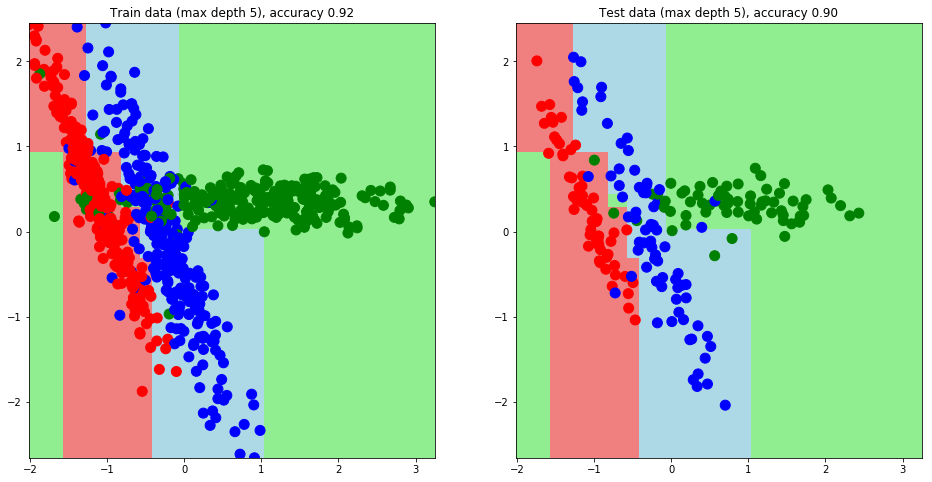

In [30]:
plot_decision_surface(classifier2, X_train, X_test, y_train, y_test)